### Comparatif d'un neurones vs un reseaux a une couche vs un  reseaux a plusieurs couches

Creation de deux dataset de base l'un lineraire et l'autre non lineraire

In [2]:
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
plt.style.use('dark_background')

In [3]:
X_li,y_li = make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
y_li = y_li.reshape((y_li.shape[0],1))
X_nl,y_nl = make_circles(n_samples=100,noise=0.1,factor=0.3,random_state=0)
y_nl = y_nl.reshape((y_nl.shape[0],1))
print("X_li shape :",X_li.shape,'\n y_li shape :',y_li.shape,'\n X_nl shape :',X_nl.shape,'\n y_nl shape :',y_nl.shape)

X_li shape : (100, 2) 
 y_li shape : (100, 1) 
 X_nl shape : (100, 2) 
 y_nl shape : (100, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

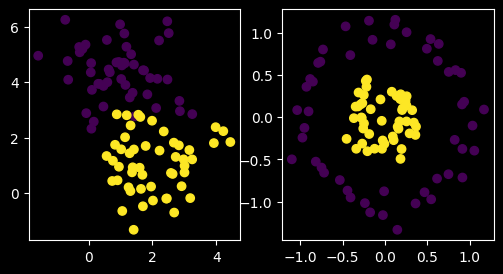

In [4]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.scatter(X_li[:,0],X_li[:,1],label = 'data set lineraire 0',c=y_li,cmap='viridis')
plt.subplot(1,2,2)
plt.scatter(X_nl[:,0],X_nl[:,1],label='data set non lineraire',c=y_nl,cmap='viridis')
plt.show

#### Reseaux a un neurone

In [5]:
import numpy as np
from numpy import random

In [6]:
#initilisation
def initialisation_l(X):
    W = random.randn(X.shape[1],1)
    b = random.randn(1)
    
    return W,b

In [7]:
#W_test,b_test = initialisation(X_li)
#print(W_test.shape)

In [8]:
#forward propagation
def froward_propagation_l(W,b,X):
    Z = X.dot(W)+b
    A = 1/(1+np.exp(-Z))
    return A


In [9]:
#loss 
def log_loss_l(y,A):
    m = len(y)
    epsilon = 1e-15
    return (1 / m) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [10]:
# backward propagation
def backward_propagation_l(X,y,A,W,m):
    y = y.reshape(-1, 1)
    m = len(y)
    dW = (1/m)*X.T.dot(A-y)
    db  = (1/m)*np.sum(A-y)
    return dW,db

In [11]:
#update 
def update_l(W,b,dW,db,learning_rate):
    W = W -learning_rate*dW
    b = b -learning_rate*db
    return W,b

In [12]:
# fonction de prediction
def predict_l(X,W,b):
    A = froward_propagation_l(W,b,X)
    return A >= 0.5

In [13]:
print(max(X_li[:,0]),min(X_li[:,0]))
print(max(X_nl[:,0]),min(X_nl[:,0]))

4.4384122962968195 -1.5767197372875836
1.1661400474082715 -1.098142755700255


In [14]:
# fonction pourtracer la frontier de decision du reseaux a un neurone 
def frontier_decision_l(X,W,b,y):
    x0 = np.linspace(max(X[:,0]),min(X[:,0]),X.shape[0])
    x1 = (-W[0]*x0-b)/W[1]
    plt.figure(figsize=(12,6))
    plt.scatter(X[:,0],X[:,1],label = 'data set ',c=y,cmap='viridis')
    plt.scatter(x0,x1,c='orange',lw=0.5)
    plt.show()


In [15]:
from tqdm import tqdm as tqdm

In [16]:
# on vas faire le neurons maitenant 
def neurone(X,y,learning_rate,n_inter=1000):

    W,b = initialisation_l(X)
    Loss =[]
    acc = []

    for i in tqdm(range(n_inter)):
        A = froward_propagation_l(W,b,X)
        dW,db =backward_propagation_l(X,y,A,W,b)
        W,b = update_l(W,b,dW,db,learning_rate)
        y_pred = predict_l(X,W,b)
        Loss.append(log_loss_l(y,A))
        acc.append(accuracy_score(y.ravel(),y_pred.ravel()))


    y_pred = predict_l(X,W,b)
    print(accuracy_score(y.ravel(),y_pred.ravel()))
    x0 = np.linspace(max(X[:,0]),min(X[:,0]),X.shape[0])
    x1 = (-W[0]*x0-b)/W[1]

    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.plot(Loss)

    plt.subplot(1,3,2)
    plt.plot(acc)

    plt.subplot(1,3,3)
    plt.scatter(X[:,0],X[:,1],label = 'data set ',c=y,cmap='viridis')
    plt.scatter(x0,x1,c='orange',lw=0.05)

    plt.show() 
    return(W,b)
        


100%|██████████| 10000/10000 [00:02<00:00, 3441.51it/s]


0.89


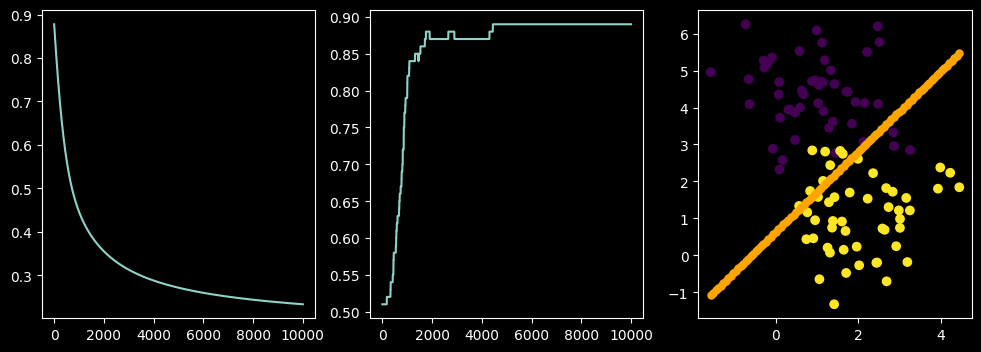

100%|██████████| 30000/30000 [00:07<00:00, 3992.30it/s]


0.47


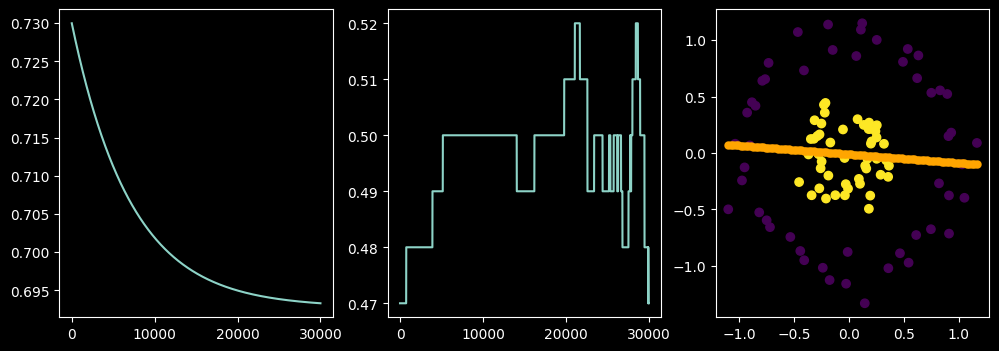

In [17]:
W_li,b_li = neurone(X_li,y_li,learning_rate=0.001,n_inter=10000)
W_nl,b_nl = neurone(X_nl,y_nl,learning_rate=0.001,n_inter=30000)

# definition du reseaux de neurones a une couche 

In [40]:
def initialisation_2(n0,n1,n2):
    w1 = random.rand(n1,n0)
    b1 = np.zeros((n1, 1))

    w2 = random.rand(n2,n1)
    b2 = np.zeros((n2, 1))
     
    parametres = {
        'w1' : w1,
        'b1' : b1,

        'w2' : w2,
        'b2' : b2

    }

    return parametres

In [41]:
def sigmoid_2(z):
    return np.where(
        z >= 0,
        1 / (1 + np.exp(-z)),        
        np.exp(z) / (1 + np.exp(z))  
    )


In [42]:
def forward_propagation_2(X,parametres):

    w1 = parametres['w1']
    b1 = parametres['b1']

    w2 = parametres['w2']
    b2 = parametres['b2']

    z1 = w1.dot(X)+b1
    a1 = sigmoid_2(z1)

    z2 = w2.dot(a1)+b2
    a2 = sigmoid_2(z2)

    activations = {
        'a1' : a1,

        'a2' :a2
    }

    return activations

In [43]:
def back_propagation_2(X,y,parametres,activations):

    a1 = activations['a1']
    w2 = parametres['w2']

    a2 = activations['a2']

    m = len(y)

    dz2 = a2 - y
    dw2 = (1/m)*dz2.dot(a1.T)
    db2 = (1/m)*np.sum(dz2,axis = 1, keepdims=True)

    dz1 = np.dot(w2.T, dz2) * a1 * (1 - a1)
    dw1 = (1/m)*dz1.dot(X.T)
    db1 = (1/m)*np.sum(dz1,axis= 1, keepdims=True)

    gradients={
        'dw1' : dw1,
        'db1' : db1,
        
        'dw2' : dw2,
        'db2' : db2
    }

    return gradients



In [44]:
def update_2(parametres,gradients,learning_rate):

    w1 = parametres['w1']
    b1 = parametres['b1']

    w2 = parametres['w2']
    b2 = parametres['b2']

    dw1 = gradients['dw1']
    db1 = gradients['db1']

    dw2 = gradients['dw2']
    db2 = gradients['db2']

    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1

    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2

    parametres={
        'w1':w1,
        'b1':b1,
        'w2':w2,
        'b2':b2
    }
    return parametres


In [45]:
def predict_2(X,parametres):
    activations = forward_propagation_2(X,parametres)
    a2 = activations['a2']
    return a2 >= 0.5

In [46]:
from sklearn.metrics import accuracy_score, log_loss

In [47]:
def neural_network_2(X,y,n1,learning_rate=0.1,n_iter=1000):
    X = X.T
    y = y.reshape((1, y.shape[0]))
    n0  = X.shape[0]
    n2 = y.shape[0]

    parametres = initialisation_2(n0,n1,n2)
    loss = []
    acc = []
    for i in tqdm(range(n_iter)):
        activations = forward_propagation_2(X,parametres)
        a2 = activations['a2']
        if i %10 == 0:
            loss.append(log_loss(y.flatten(), a2.flatten()))
            y_pred = predict_2(X, parametres)
            acc.append(accuracy_score(y.flatten(), y_pred.flatten()))

        gradients = back_propagation_2(X,y,parametres,activations)
        parametres = update_2(parametres,gradients,learning_rate)
            
    y_pred = predict_2(X, parametres)
    print(accuracy_score(y.ravel(),y_pred.ravel()))
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    plt.plot(loss,label='train loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(acc,label="accuracy")
    plt.legend()
    plt.show()
    return (parametres)

100%|██████████| 10000/10000 [00:01<00:00, 5274.21it/s]


0.98


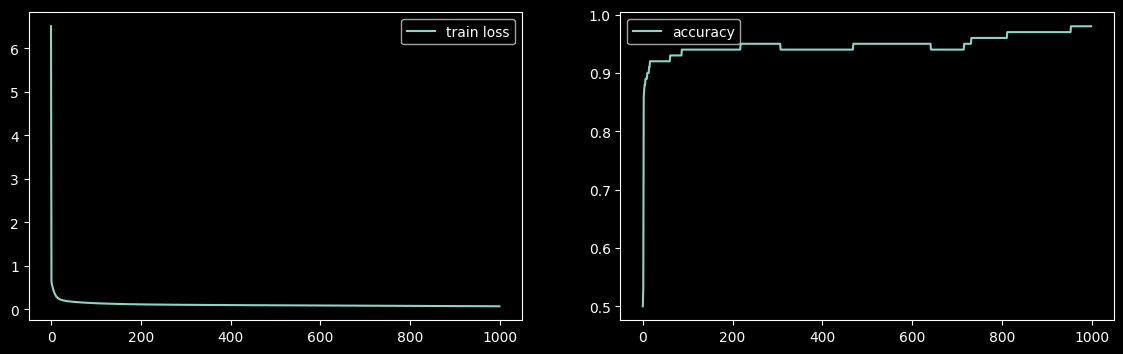

100%|██████████| 10000/10000 [00:01<00:00, 5212.62it/s]


1.0


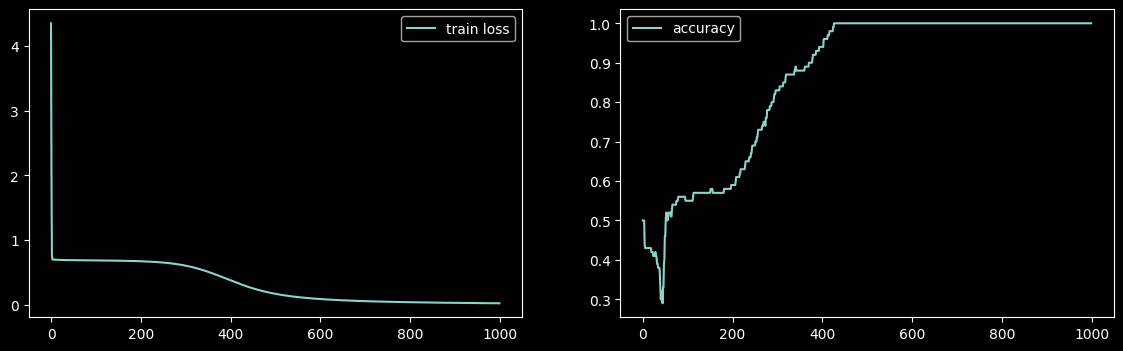

In [48]:
parametres_li = neural_network_2(X_li,y_li,n1=32,learning_rate=0.001,n_iter=10000)
parametres_nl = neural_network_2(X_nl,y_nl,n1=32,learning_rate=0.001,n_iter=10000)

### creation de code pour un reseaux de n couches

In [54]:
#initisalisation 
def initialisation(dimensions):
    parameters = {}
    C = len(dimensions)

    for c in range(1,C):
        parameters  ['W'+str(c)] = np.random.randn(dimensions[c],dimensions[c-1])
        parameters  ['b'+str(c)] = np.random.randn(dimensions[c],1)

    return parameters



In [56]:
# test de la fonction d'initialisation 
parametres_test = initialisation([2,32,15,1])

for key,val in parametres_test.items():
    print(key,val.shape)


W1 (32, 2)
b1 (32, 1)
W2 (15, 32)
b2 (15, 1)
W3 (1, 15)
b3 (1, 1)


In [60]:
# foraward propagation 
def forward(X,parameters):

    activations = {'A0':X}

    C = len(parameters) // 2 

    for c in range(1,C+1):
        Z = parameters['W'+str(c)].dot(activations['A' + str(c-1)]) + parameters['b' + str(c)]
        activations ['A'+str(c)] = 1/(1+np.exp(-Z))
    return activations

In [78]:
# test de la fonction de forward
X_test,y_test = make_blobs(n_samples=100,n_features=2,random_state=0)
X_test = X_test.T
activations_test = forward(X_test,parametres_test)
print(y_test.shape)
y_test = y_test.reshape(y_test.shape[0],1)
y_test = y_test.T
print(y_test.shape)
for key,val in activations_test.items():
    print(key,val.shape)

(100,)
(1, 100)
A0 (2, 100)
A1 (32, 100)
A2 (15, 100)
A3 (1, 100)


In [76]:
# definition de la back propagation 
def back_propagation(y,parameters,activations):
    m = y.shape[1]
    C = len(parameters) // 2

    dz = activations['A' + str(C)] - y
    gradients = {}

    for c in reversed(range(1,C+1)):
        gradients['dW' + str(c)] = (1/m)*np.dot(dz,activations['A' + str(c-1)].T)
        gradients['db' + str(c)] = (1/m) * np.sum(dz,axis=1,keepdims=True)
        if c > 1:
            dz  = np.dot(parameters['W'+str(c)].T, dz)*activations['A'+str(c-1)]*(1-activations['A'+str(c-1)])

    return gradients


In [79]:
# on test le back propagation
grad_test = back_propagation(y_test,parametres_test,activations_test)

for key,val in grad_test.items():
    print(key,val.shape)

dW3 (1, 15)
db3 (1, 1)
dW2 (15, 32)
db2 (15, 1)
dW1 (32, 2)
db1 (32, 1)


In [80]:
# definition de l'update
def update(gradients, parametres, learning_rate):
    C = len(parametres) // 2

    for c in range(1,C+1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]

    return parametres

In [82]:
def predict(X,parametres):
    activations = forward(X,parametres)
    C = len(parametres) // 2
    Af = activations['A' + str(C)]
    return Af >= 0.5

In [93]:
# on defini le reseaux de neurones 
def neural_network(X,y,hidden_layers=(32,32,32),learning_rate = 0.01, n_iter=1000):
    X = X.T
    y = y.reshape((1, y.shape[0]))
    dimensions = list(hidden_layers)
    dimensions.insert(0,X.shape[0])
    dimensions.append(y.shape[0])
    parametres = initialisation(dimensions)

    train_loss = []
    train_acc = []

    for i in tqdm(range(1,n_iter)):
        activations = forward(X,parametres)
        grad = back_propagation(y,parametres,activations)
        parametres = update(grad,parametres,learning_rate)

        if i%10 == 0:
            C = len(parametres) // 2 
            train_loss.append(log_loss(y,activations['A'+ str(C)]))
            y_pred = predict(X,parametres)
            current_accuracy = accuracy_score(y.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

    # 1) Courbe de perte
    axes[0].plot(train_loss, label='train loss')
    axes[0].set_title('Loss')
    axes[0].set_xlabel('Iteration')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    # 2) Accuracy
    axes[1].plot(train_acc, label='train acc')
    axes[1].set_title('Accuracy')
    axes[1].set_xlabel('Iteration')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.show()

    return parametres

  0%|          | 0/999 [00:00<?, ?it/s]c:\Users\oterf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
c:\Users\oterf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
c:\Users\oterf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
c:\Users\oterf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
c:\Users\oterf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2

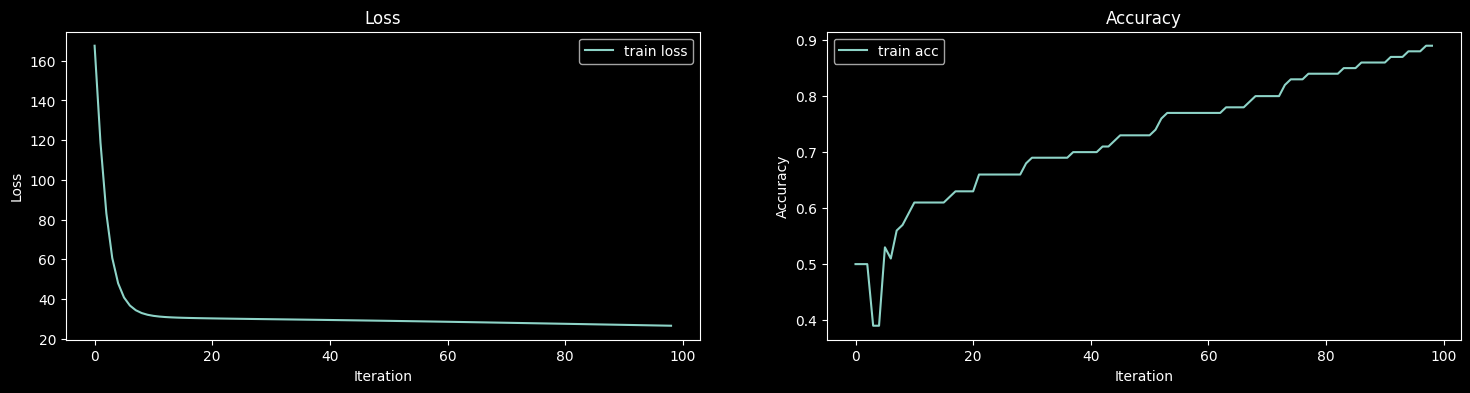

In [94]:
parameters_total = neural_network(X_nl,y_nl,hidden_layers=(32,32,32),learning_rate = 0.01, n_iter=1000)